In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('Fake_Real_Data.csv')

In [11]:
print(df.shape)
df.head()

(9900, 2)


,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [15]:
df.label.value_counts()

label
Fake    5000
Real    4900
Name: count, dtype: int64

In [17]:
df['label_num'] = df['label'].apply(lambda x: 1 if x == 'Fake' else 0)

In [19]:
df.head()

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,1
1,U.S. conservative leader optimistic of common ...,Real,0
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,0
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,1
4,Democrats say Trump agrees to work on immigrat...,Real,0


# Modelling without Pre-processing Text data

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Text, df.label_num, test_size=0.20, random_state=42, stratify=df.label_num)

In [89]:
X_train.shape

(7920,)

In [91]:
X_test.shape

(1980,)

### Attempt 1 :

using sklearn pipeline module create a classification pipeline to classify the Data.

### Note:

- using CountVectorizer with unigram, bigram, and trigrams.
- use KNN as the classifier with n_neighbors of 10 and metric as 'euclidean' distance.
- print the classification report.

In [94]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier


pipe = Pipeline([
    ('Vectorizer', CountVectorizer()),
    ('KNN', KNeighborsClassifier(n_neighbors=10, metric='euclidean'))
])

In [96]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('Vectorizer', CountVectorizer()),
                ('KNN',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=10))])

In [97]:
y_pred = pipe.predict(X_test)

In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       980
           1       0.98      0.90      0.93      1000

    accuracy                           0.94      1980
   macro avg       0.94      0.94      0.94      1980
weighted avg       0.94      0.94      0.94      1980



### Attempt 2 :

using the sklearn pipeline module create a classification pipeline to classify the Data.

### Note:

- using CountVectorizer with unigram, bigram, and trigrams.
- use KNN as the classifier with n_neighbors of 10 and metric as 'cosine' distance.
- print the classification report.

In [100]:
pipe = Pipeline([
    ('Vectorizer', CountVectorizer(ngram_range=(1,3))),
    ('KNN', KNeighborsClassifier(n_neighbors=10, metric='euclidean'))
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('Vectorizer', CountVectorizer(ngram_range=(1, 3))),
                ('KNN',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=10))])

In [102]:
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.99      0.77       980
           1       0.98      0.43      0.59      1000

    accuracy                           0.71      1980
   macro avg       0.80      0.71      0.68      1980
weighted avg       0.80      0.71      0.68      1980



### Attempt 3 :

using the sklearn pipeline module create a classification pipeline to classify the Data.

### Note:

- using CountVectorizer with only trigrams.
- use RandomForest as the classifier.
- print the classification report.

In [104]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([
    ('Vectorizer', CountVectorizer()),
    ('RandomForest', RandomForestClassifier())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('Vectorizer', CountVectorizer()),
                ('RandomForest', RandomForestClassifier())])

In [105]:
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1000

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980



### Attempt 4 :

using the sklearn pipeline module create a classification pipeline to classify the Data.

### Note:

- using CountVectorizer with both unigram and bigrams.
- use Multinomial Naive Bayes as the classifier with an alpha value of 0.75.
- print the classification report.

In [109]:
from sklearn.naive_bayes import MultinomialNB

pipe = Pipeline([
    ('Vectorizer', CountVectorizer()),
    ('NB', MultinomialNB())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('Vectorizer', CountVectorizer()), ('NB', MultinomialNB())])

In [110]:
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.98      0.97      0.98      1000

    accuracy                           0.98      1980
   macro avg       0.98      0.98      0.98      1980
weighted avg       0.98      0.98      0.98      1980



# Using text pre-processing to remove stop words, punctuations and apply lemmatization

In [79]:
import spacy

nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [81]:
preprocessed_txt = df.Text.apply(preprocess)

In [117]:
preprocessed_txt.head()

0      Trump Surrogate BRUTALLY Stabs Pathetic vide...
1    U.S. conservative leader optimistic common gro...
2    trump propose U.S. tax overhaul stir concern d...
3      Court Forces Ohio allow million illegally pu...
4    Democrats Trump agree work immigration bill wa...
Name: Text, dtype: object

In [119]:
X_train, X_test, y_train, y_test = train_test_split(preprocessed_txt, df.label_num, test_size=0.20, random_state=42, stratify=df.label_num)

### Let's check the scores with our best model till now

- Random Forest

### Attempt1 :

using the sklearn pipeline module create a classification pipeline to classify the Data.

### Note:

- using CountVectorizer with only trigrams.
- using RandomForest as the classifier.
- print the classification report.

In [123]:
pipe = Pipeline([
    ('Vectorizer', CountVectorizer(ngram_range=(3,3))),
    ('RandomForest', RandomForestClassifier())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('Vectorizer', CountVectorizer(ngram_range=(3, 3))),
                ('RandomForest', RandomForestClassifier())])

In [124]:
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       980
           1       0.92      0.98      0.95      1000

    accuracy                           0.95      1980
   macro avg       0.95      0.95      0.95      1980
weighted avg       0.95      0.95      0.95      1980



### Attempt2 :

using the sklearn pipeline module create a classification pipeline to classify the Data.

### Note:

- using CountVectorizer with unigram, Bigram, and trigrams.
- use RandomForest as the classifier.
- print the classification report.

In [128]:
pipe = Pipeline([
    ('Vectorizer', CountVectorizer(ngram_range=(1,3))),
    ('RandomForest', RandomForestClassifier())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('Vectorizer', CountVectorizer(ngram_range=(1, 3))),
                ('RandomForest', RandomForestClassifier())])

In [129]:
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1000

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980



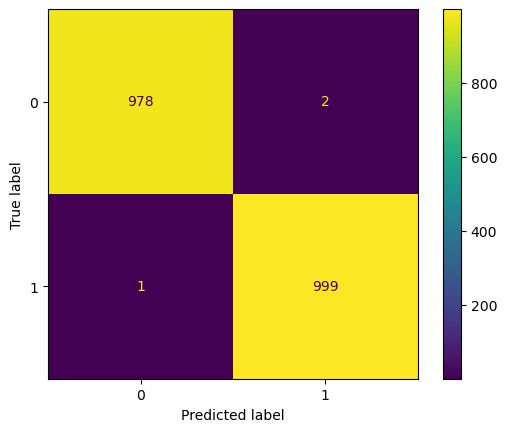

In [138]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()